In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# statsmodels 
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#Fix random seed for reproducibility
np.random.seed(321)

#Set global scikit-learn configuration 
from sklearn import set_config

#Display estimators as a diagram
set_config(display='diagram')

#Set max columns for dataframes
pd.set_option('display.max_columns',100)

In [2]:
#Load in combined data set
FOLDER = 'Data/'
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.075,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,0.704,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.887,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,26.988,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2305.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",2.984,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [3]:
#Preview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2616 non-null   object 
 1   adult                  2606 non-null   float64
 2   backdrop_path          1447 non-null   object 
 3   belongs_to_collection  211 non-null    object 
 4   budget                 2606 non-null   float64
 5   genres                 2606 non-null   object 
 6   homepage               170 non-null    object 
 7   id                     2606 non-null   float64
 8   original_language      2606 non-null   object 
 9   original_title         2606 non-null   object 
 10  overview               2562 non-null   object 
 11  popularity             2606 non-null   float64
 12  poster_path            2365 non-null   object 
 13  production_companies   2606 non-null   object 
 14  production_countries   2606 non-null   object 
 15  rele

## Clean Data

In [4]:
#Drop unnecessary columns
drop_cols = ['backdrop_path','original_title','overview',
             'poster_path','status','tagline','id','homepage',
             'production_countries','video','production_companies','spoken_languages',
             'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R


In [5]:
# remove ids that are 0
df = df.loc[df['imdb_id']!='0']
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,tt7797790,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2001-01-01,0.0,72.0,Edmund Kemper Part 3: La mort sévit,0.000,0.0,NaN
2602,tt8665056,0.0,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",0.600,2001-10-10,0.0,85.0,Guns Along The Bravo,0.000,0.0,NaN
2603,tt8795764,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2001-01-01,0.0,57.0,New Breed,0.000,0.0,NR
2604,tt9071078,0.0,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",1.400,2001-07-12,0.0,90.0,Chinese Heroes,3.000,2.0,NaN


In [6]:
# Change values in belongs to collection column to true/false
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    2395
True      211
Name: belongs_to_collection, dtype: int64

In [7]:
# Function to get list of genres from each movie
def get_genre_name(x):
    x = str(x).replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [8]:
# Test function
get_genre_name(df.loc[3,'genres'])

['Drama', 'Romance']

In [9]:
# Use function to explode genres to new columns
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",0.704,2000-11-15,0.0,100.0,For the Cause,5.45,10.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.887,2000-04-14,0.0,152.0,Gang,4.00,1.0,NaN,Drama


In [10]:
# Saving unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [11]:
# Onehot encode genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,"[Comedy, Music, Romance]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,[Science Fiction],False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,"[Drama, Action, Crime]",False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG,"[Drama, Romance]",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,[Drama],False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Dropping genres and genres_list 
df = df.drop(columns = ['genres', 'genres_list'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Preview certification column values
df['certification'].value_counts(dropna = False)

NaN        1789
R           466
PG-13       182
NR           76
PG           62
G            24
NC-17         6
Unrated       1
Name: certification, dtype: int64

In [14]:
# Remove extra space
df['certification'] = df['certification'].str.strip()

In [15]:
# Clean up extra ratings
cert_dict = {'Unrated': 'NR',
            'UR': 'NR',
            'Not Rated': 'NR',
            'ScreamFest Horror Film Festival': 'NR'}

#Replace values
df['certification'] = df['certification'].replace(cert_dict)
df['certification'].value_counts(dropna = False)

NaN      1789
R         466
PG-13     182
NR         77
PG         62
G          24
NC-17       6
Name: certification, dtype: int64

In [16]:
# Splitting release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [17]:
# Drop original release date column
df = df.drop(columns = 'release_date')

In [18]:
# Preview final df
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,2.075,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,0.704,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.887,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,26.988,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,2.984,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0


## Machine Learning Pre-processing

In [19]:
# Define X and y
drop_for_model = ['title','imdb_id']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

In [20]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
1867,0.0,False,7000000.0,6.129,114.0,5.800,89.0,PG-13,False,False,False,False,True,False,True,False,False,False,False,True,True,False,True,False,False,False,False,2001.0,8.0,3.0
1730,0.0,False,0.0,6.542,100.0,6.792,89.0,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,1.0,27.0
1706,0.0,False,0.0,10.564,94.0,5.900,197.0,PG,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,2001.0,3.0,2.0
928,0.0,False,0.0,1.151,74.0,6.140,25.0,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,1.0
1871,0.0,False,0.0,2.930,99.0,5.200,20.0,R,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,1.0,1.0


In [21]:
# Make cat selector and use it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [22]:
# Save manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [23]:
# Make num selector and use it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [24]:
# Change OHE columns to numeric
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [25]:
# Cat pipeline
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [26]:
# num pipeline
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))

In [27]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_ave...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [28]:
# Fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_ave...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [29]:
# Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [30]:
# Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)


# Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
print(len(final_features))

# Checking shape matches len final features
print(preprocessor.transform(X_train).shape)

36
(1954, 36)


In [31]:
# Make X_train_tf 
X_train_tf = pd.DataFrame(preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1867,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7000000.0,6.129,114.0,5.800,89.0,2001.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.542,100.0,6.792,89.0,2001.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1706,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.564,94.0,5.900,197.0,2001.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
928,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.151,74.0,6.140,25.0,2000.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1871,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.930,99.0,5.200,20.0,2001.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Make X_test_tf 
X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1965,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.728,94.0,1.500,4.0,2001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.863,112.0,6.000,9.0,2001.0,10.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.981,90.0,4.200,4.0,2000.0,7.0,7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.397,132.0,7.079,127.0,2001.0,1.0,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
842,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.691,85.0,6.300,15.0,2000.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=True)
X_test_df = sm.add_constant(X_test_tf, prepend=True)
display(X_train_df.head(2),X_test_df.head(2))

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1867,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7000000.0,6.129,114.0,5.800,89.0,2001.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1730,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.542,100.0,6.792,89.0,2001.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1965,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.728,94.0,1.5,4.0,2001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2267,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.863,112.0,6.0,9.0,2001.0,10.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Model 1

In [34]:
#Instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

#Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     271.7
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:25:27   Log-Likelihood:                -35738.
No. Observations:                1954   AIC:                         7.155e+04
Df Residuals:                    1918   BIC:                         7.175e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.814e+06   9.84e+08     -0.008      0.994   -1.94e+09    1.92e+09
certification_G        1.914e+07   1.41e+08      0.136      0.892   -2.57e+08    2.95e+08
certification_MISSING -2.338e+06    1.4e+08     -0.017      0.987   -2.78e+08    2.73e+08
certification_NC-17   -1.958e+06   1.41e+08     -0.014      0.989   -2.79e+08    2.75e+08
certification_NR      -3.075e+06   1.41e+08     -0.022      0.983   -2.79e+08    2.73e+08
certification_PG      -9.786e+06   1.41e+08     -0.070      0.944   -2.85e+08    2.66e+08
certification_PG-13   -9.391e+05   1.41e+08     -0.007      0.995   -2.77e+08    2.75e+08
certification_R       -8.859e+06   1.41e+08     -0.063      0.950   -2.84e+08    2.67e+08
adult                   -6.8e+05   1.66e+07     -0.041      0.967   -3.33e+07     3.2e+07
budget                    1.0294      0.041     25.237      0.000       0.949       1.109
popularity             5.271e+05   8.63e+04      6.107      0.000    3.58e+05    6.96e+05
runtime                9668.7832   1.86e+04      0.520      0.603   -2.68e+04    4.61e+04
vote_average          -5.085e+05   2.31e+05     -2.198      0.028   -9.62e+05   -5.49e+04
vote_count             2.335e+04    546.909     42.693      0.000    2.23e+04    2.44e+04
year                   5877.3488   5.62e+05      0.010      0.992    -1.1e+06    1.11e+06
month                 -1.088e+05   1.37e+05     -0.795      0.427   -3.77e+05     1.6e+05
day                   -2.209e+04   5.31e+04     -0.416      0.677   -1.26e+05     8.2e+04
belongs_to_collection  6.629e+06   1.96e+06      3.389      0.001    2.79e+06    1.05e+07
Genre_Comedy          -2.111e+05   1.19e+06     -0.178      0.859   -2.54e+06    2.12e+06
Genre_Music            -2.02e+06   3.94e+06     -0.513      0.608   -9.74e+06     5.7e+06
Genre_Romance          1.397e+06   1.33e+06      1.047      0.295   -1.22e+06    4.01e+06
Genre_Science Fiction -2.533e+06   2.26e+06     -1.122      0.262   -6.96e+06    1.89e+06
Genre_Drama            -1.53e+06   1.14e+06     -1.337      0.181   -3.77e+06    7.14e+05
Genre_Action          -3.432e+05    1.5e+06     -0.229      0.819   -3.28e+06     2.6e+06
Genre_Crime           -2.828e+06   1.61e+06     -1.751      0.080   -5.99e+06     3.4e+05
Genre_Adventure        5.978e+06   2.33e+06      2.571      0.010    1.42e+06    1.05e+07
Genre_Animation       -1.678e+07   3.22e+06     -5.214      0.000   -2.31e+07   -1.05e+07
Genre_Fantasy         -2.289e+06   2.44e+06     -0.940      0.348   -7.07e+06    2.49e+06
Genre_Horror            -1.4e+06   1.76e+06     -0.794      0.427   -4.86e+06    2.06e+06
Genre_Thriller         4.176e+05   1.44e+06      0.290      0.772   -2.41e+06    3.25e+06
Genre_History         -6.023e+06   3.78e+06     -1.593      0.111   -1.34e+07    1.39e+06
Genre_Family          -

In [35]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.832
Testing R^2: 0.797


- R2 score on this model was 79.7%. Would try other measures.

## Assumptions

In [36]:
# Function to plot qq plot and residual plot
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()

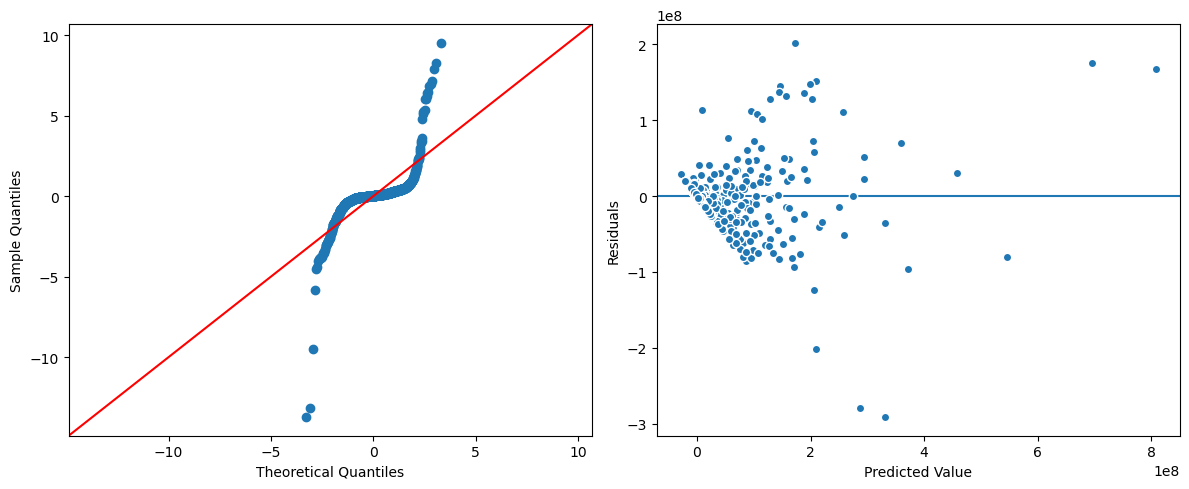

In [37]:
# Test function
evaluate_ols(result,X_train_df, y_train)

### Model 2

- I'll be doing an extra cleaning on this second part of my model

In [38]:
# Reload the data
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.075,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,0.704,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.887,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,26.988,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2305.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",2.984,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [39]:
# Dropping unnecessary columns
drop_cols = ['backdrop_path','original_title','overview',
             'poster_path', 'tagline','id','homepage',
             'production_countries','video', 'spoken_languages',
             'original_language', 'status', 'production_companies']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R


In [40]:
# remove ids that are 0
df = df.loc[df['imdb_id']!='0']
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,tt7797790,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2001-01-01,0.0,72.0,Edmund Kemper Part 3: La mort sévit,0.000,0.0,NaN
2602,tt8665056,0.0,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",0.600,2001-10-10,0.0,85.0,Guns Along The Bravo,0.000,0.0,NaN
2603,tt8795764,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2001-01-01,0.0,57.0,New Breed,0.000,0.0,NR
2604,tt9071078,0.0,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",1.400,2001-07-12,0.0,90.0,Chinese Heroes,3.000,2.0,NaN


In [41]:
# Change values in belongs to collection column to true/false
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    2395
True      211
Name: belongs_to_collection, dtype: int64

In [42]:
# Function to get list of genres from each movie
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [43]:
# Test function
get_genre_name(df.loc[3,'genres'])

['Drama', 'Romance']

In [44]:
# Use function to explode genres to new columns
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",0.704,2000-11-15,0.0,100.0,For the Cause,5.45,10.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.887,2000-04-14,0.0,152.0,Gang,4.00,1.0,NaN,Drama


In [45]:
# Save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [46]:
# Onehot encode genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,"[Comedy, Music, Romance]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,[Science Fiction],False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,"[Drama, Action, Crime]",False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG,"[Drama, Romance]",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,[Drama],False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
# Drop genres and genres_list 
df = df.drop(columns = ['genres', 'genres_list'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
# Preview certification column values
df['certification'].value_counts(dropna = False)

NaN        1789
R           466
PG-13       182
NR           76
PG           62
G            24
NC-17         6
Unrated       1
Name: certification, dtype: int64

In [49]:
# Removing extra space
df['certification'] = df['certification'].str.strip()

In [50]:
# Clean up extra ratings
cert_dict = {'Unrated': 'NR',
            'UR': 'NR',
            'Not Rated': 'NR',
            'ScreamFest Horror Film Festival': 'NR'}

#Replace values
df['certification'] = df['certification'].replace(cert_dict)
df['certification'].value_counts(dropna = False)

NaN      1789
R         466
PG-13     182
NR         77
PG         62
G          24
NC-17       6
Name: certification, dtype: int64

In [51]:
# Split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,2.075,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,0.704,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.887,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,26.988,2000-09-29,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,2.984,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [52]:
# Drop original release date column
df = df.drop(columns = 'release_date')

In [53]:
# Filter out movies that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,tt0118694,0.0,False,150000.0,26.988,14204632.0,99.0,In the Mood for Love,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,tt0120467,0.0,False,120000.0,3.052,14904.0,87.0,Vulgar,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,tt0120630,0.0,True,45000000.0,56.935,224834564.0,84.0,Chicken Run,6.756,4470.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,tt0120753,0.0,False,8000000.0,15.377,105983.0,122.0,The Million Dollar Hotel,5.896,289.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,tt0120755,0.0,True,125000000.0,36.519,546388105.0,123.0,Mission: Impossible II,6.118,6087.0,PG-13,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,tt0294289,0.0,False,344.0,1.087,342855.0,104.0,American Adobo,4.400,7.0,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,9.0,29.0
2309,tt0296042,0.0,False,1400010.0,18.129,80631.0,129.0,Ichi the Killer,6.967,848.0,NaN,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,2001.0,12.0,22.0
2421,tt0310790,0.0,True,3747230.0,3.232,482902.0,83.0,The Living Forest,5.400,23.0,PG,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,2003.0,1.0,2.0
2533,tt0445841,0.0,False,12500000.0,0.607,123021750.0,94.0,A Gambler's Story,6.800,3.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,10.0,11.0


In [54]:
# Drop title and imdb_id
df = df.drop(columns = ['title', 'imdb_id'])
df.head()

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,26.988,14204632.0,99.0,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,3.052,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,56.935,224834564.0,84.0,6.756,4470.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,15.377,105983.0,122.0,5.896,289.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,0.0,True,125000000.0,36.519,546388105.0,123.0,6.118,6087.0,PG-13,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,2000.0,5.0,24.0


In [55]:
# Concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,revenue
1867,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7000000.0,6.129,114.0,5.800,89.0,2001.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3646994.0
1730,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.542,100.0,6.792,89.0,2001.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1706,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.564,94.0,5.900,197.0,2001.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
928,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.151,74.0,6.140,25.0,2000.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.930,99.0,5.200,20.0,2001.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.632,91.0,3.000,1.0,2000.0,6.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.687,91.0,0.500,1.0,2001.0,10.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,0.0,0.000,0.0,2001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.052,89.0,5.500,2.0,2000.0,12.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
## save plot_cols list to show (dropping genre from plot_df from pair_plot)
genre_cols = [c for c in df.columns if c.startswith('Genre')]
plot_cols = plot_df.drop(columns=['revenue',*genre_cols]).columns
len(plot_cols)

18

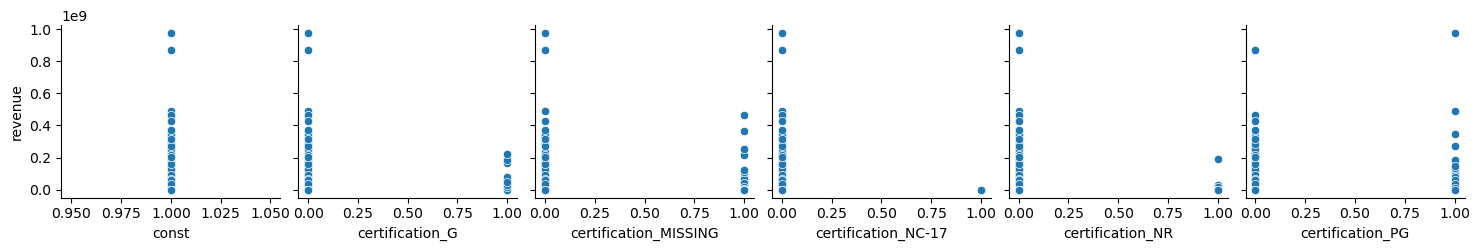

In [57]:
# Pairplot of first 6 cols
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[:6]);

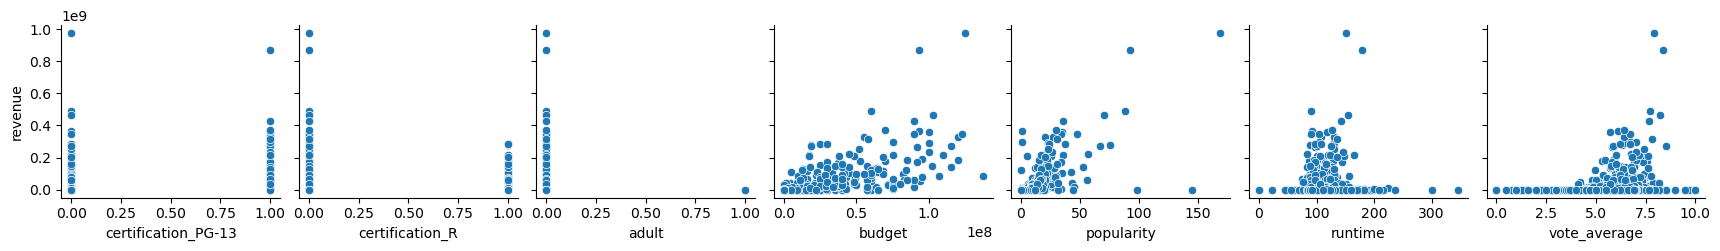

In [58]:
# Pairplot of next 6 cols
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[6:13]);

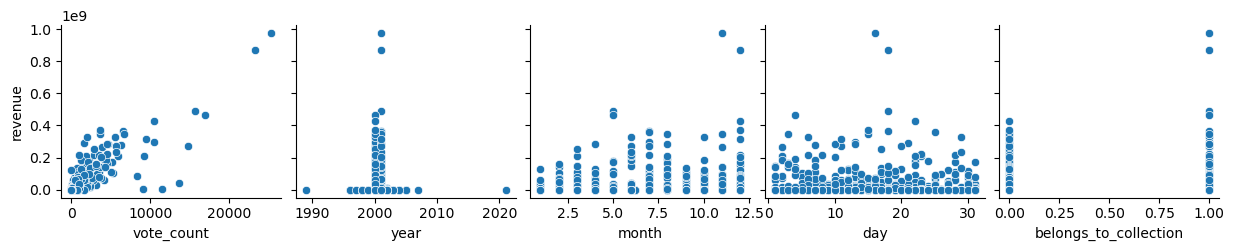

In [59]:
# Pairplot of next 6 cols
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[13:]);

In [60]:
# Remove movies prior to 2000
df = df.loc[ df['year']>=2000]
df

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,26.988,14204632.0,99.0,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,3.052,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,56.935,224834564.0,84.0,6.756,4470.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,15.377,105983.0,122.0,5.896,289.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,0.0,True,125000000.0,36.519,546388105.0,123.0,6.118,6087.0,PG-13,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.0,False,344.0,1.087,342855.0,104.0,4.400,7.0,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,9.0,29.0
2309,0.0,False,1400010.0,18.129,80631.0,129.0,6.967,848.0,NaN,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,2001.0,12.0,22.0
2421,0.0,True,3747230.0,3.232,482902.0,83.0,5.400,23.0,PG,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,2003.0,1.0,2.0
2533,0.0,False,12500000.0,0.607,123021750.0,94.0,6.800,3.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,10.0,11.0


In [61]:
#Function for train/test split
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test

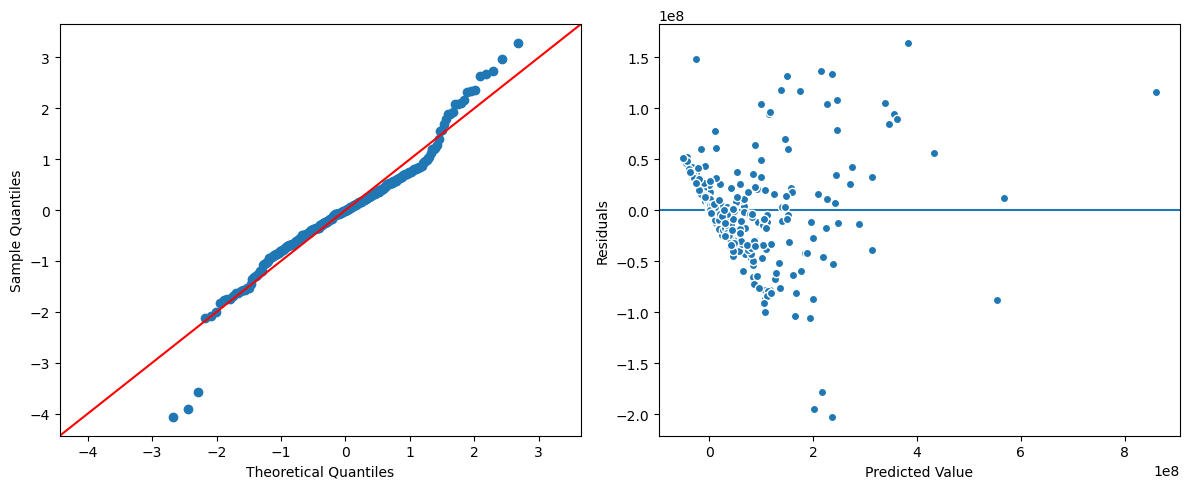

In [62]:
#Use function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [63]:
# Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.830
Testing R^2: 0.734


- R2 score on this model was 73.4%. Would also try other measures.

### Model 3

- For thid 3rd part of my model I'll be removing outliers

In [64]:
# Function to find outliers using z-scores
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [65]:
# Save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 8 outliers found in runtime using Z-Scores.
- 8 outliers found in popularity using Z-Scores.
- 9 outliers found in revenue using Z-Scores.


In [66]:
# Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, idx_outliers in outliers.items():
    df_clean = df_clean[~idx_outliers]
df_clean

/var/folders/j7/rq_q1cb16yx0w__bmvd7lzx80000gn/T/ipykernel_45389/1890287056.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~idx_outliers]


,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,26.988,14204632.0,99.0,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,3.052,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,56.935,224834564.0,84.0,6.756,4470.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,15.377,105983.0,122.0,5.896,289.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
17,0.0,True,75000000.0,1.410,296339527.0,104.0,7.000,10485.0,PG-13,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,2000.0,7.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.0,False,344.0,1.087,342855.0,104.0,4.400,7.0,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,9.0,29.0
2309,0.0,False,1400010.0,18.129,80631.0,129.0,6.967,848.0,NaN,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,2001.0,12.0,22.0
2421,0.0,True,3747230.0,3.232,482902.0,83.0,5.400,23.0,PG,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,2003.0,1.0,2.0
2533,0.0,False,12500000.0,0.607,123021750.0,94.0,6.800,3.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,10.0,11.0


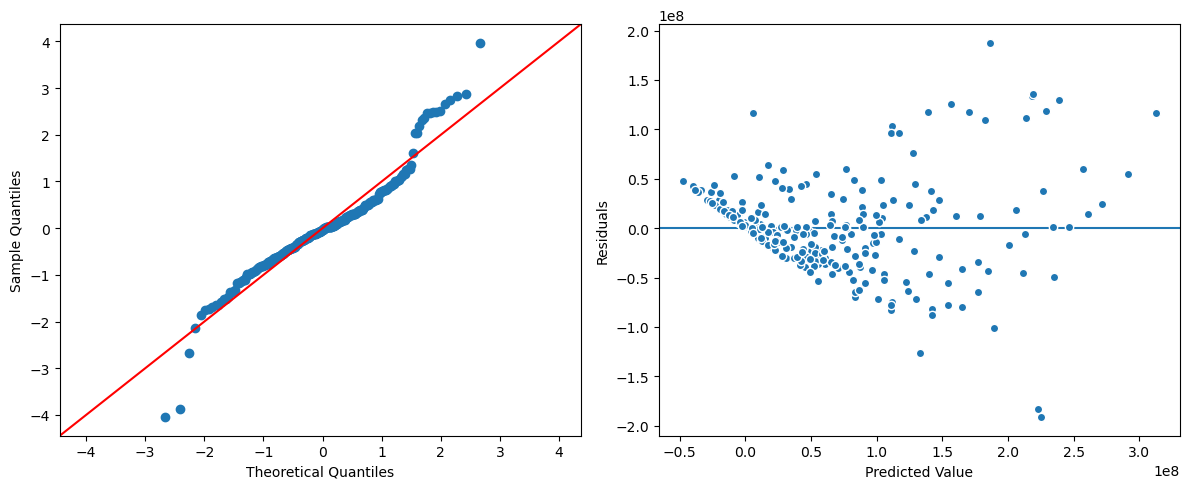

In [67]:
# Run model 3
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [68]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.701
Testing R^2: 0.521


- Our R2 score on this model was 52.1%. I would say this was a poorer model from our other tested models.

### Model 4

- I would be removing outliers on this model too, but with the use of IQR

<Axes: xlabel='revenue'>

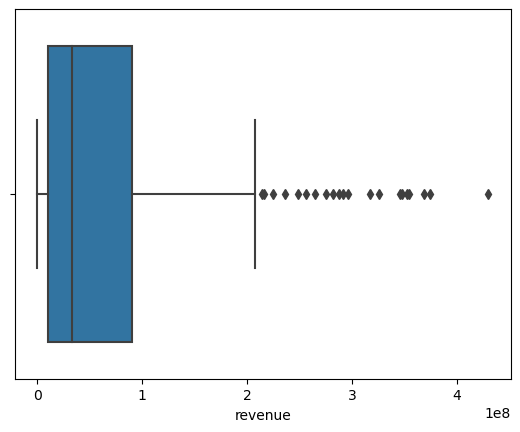

In [69]:
# Check revenue for outliers
sns.boxplot(x = y_train)

In [70]:
# Function to find outliers using IQR 
def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

In [71]:
#Loop to remove outliers from same columns using new function
outlier_cols = ['runtime','popularity','revenue']

## Empty dict for both types of outliers
outliers_z = {}
outliers_iqr = {}

## Use both functions to see the comparison for # of outliers
for col in outlier_cols:
    outliers_col_z = find_outliers(df[col])
    outliers_z[col] = outliers_col_z
    
    outliers_col_iqr = find_outliers_IQR(df[col])
    outliers_iqr[col] = outliers_col_iqr
    print()

- 8 outliers found in runtime using Z-Scores.
- 14 outliers found in runtime using IQR.

- 8 outliers found in popularity using Z-Scores.
- 19 outliers found in popularity using IQR.

- 9 outliers found in revenue using Z-Scores.
- 33 outliers found in revenue using IQR.



In [72]:
# Remove_outliers using z-scores
df_clean_z = df.copy()
for col, idx_outliers in outliers_z.items():
    df_clean_z = df_clean_z[~idx_outliers]
df_clean_z

/var/folders/j7/rq_q1cb16yx0w__bmvd7lzx80000gn/T/ipykernel_45389/3068044892.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_z = df_clean_z[~idx_outliers]


,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,26.988,14204632.0,99.0,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,3.052,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,56.935,224834564.0,84.0,6.756,4470.0,G,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,15.377,105983.0,122.0,5.896,289.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
17,0.0,True,75000000.0,1.410,296339527.0,104.0,7.000,10485.0,PG-13,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,2000.0,7.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.0,False,344.0,1.087,342855.0,104.0,4.400,7.0,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,9.0,29.0
2309,0.0,False,1400010.0,18.129,80631.0,129.0,6.967,848.0,NaN,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,2001.0,12.0,22.0
2421,0.0,True,3747230.0,3.232,482902.0,83.0,5.400,23.0,PG,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,2003.0,1.0,2.0
2533,0.0,False,12500000.0,0.607,123021750.0,94.0,6.800,3.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,10.0,11.0


In [73]:
# Remove_outliers using IQR
df_clean_iqr = df.copy()
for col, idx_outliers in outliers_iqr.items():
    df_clean_iqr = df_clean_iqr[~idx_outliers]
df_clean_iqr

/var/folders/j7/rq_q1cb16yx0w__bmvd7lzx80000gn/T/ipykernel_45389/1714386592.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_iqr = df_clean_iqr[~idx_outliers]


,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,False,150000.0,26.988,14204632.0,99.0,8.111,2305.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,3.052,14904.0,87.0,5.500,44.0,R,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,2002.0,4.0,26.0
15,0.0,False,8000000.0,15.377,105983.0,122.0,5.896,289.0,R,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2000.0,2.0,9.0
18,0.0,False,75000000.0,17.461,36754634.0,94.0,6.600,987.0,PG,False,False,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,False,False,2000.0,6.0,16.0
21,0.0,False,24000000.0,12.111,36609995.0,115.0,6.568,389.0,PG,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,0.0,False,15000000.0,15.123,4035192.0,108.0,7.124,406.0,PG-13,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,2001.0,5.0,26.0
2278,0.0,False,344.0,1.087,342855.0,104.0,4.400,7.0,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2001.0,9.0,29.0
2309,0.0,False,1400010.0,18.129,80631.0,129.0,6.967,848.0,NaN,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,2001.0,12.0,22.0
2421,0.0,True,3747230.0,3.232,482902.0,83.0,5.400,23.0,PG,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,2003.0,1.0,2.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.72e-28
Time:                        17:25:29   Log-Likelihood:                -4303.0
No. Observations:                 230   AIC:                             8670.
Df Residuals:                     198   BIC:                             8780.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G       -6077.9728   1.19e+04     -0.513      0.609   -2.95e+04    1.73e+04
certification_MISSING     0.7100      0.124      5.705      0.000       0.465       0.955
certification_NR       1.706e+06   4.91e+05      3.478      0.001    7.39e+05    2.67e+06
certification_PG       3.799e+05   2.36e+05      1.612      0.109   -8.49e+04    8.45e+05
certification_PG-13    4.665e+06   3.43e+06      1.359      0.176    -2.1e+06    1.14e+07
certification_R        5701.1800   1677.111      3.399      0.001    2393.889    9008.471
adult                  -2.45e+06    4.7e+06     -0.521      0.603   -1.17e+07    6.82e+06
budget                -2.545e+04   7.32e+05     -0.035      0.972   -1.47e+06    1.42e+06
popularity            -3.348e+05   2.86e+05     -1.172      0.242   -8.98e+05    2.28e+05
runtime                7.052e+08   1.34e+09      0.525      0.600   -1.94e+09    3.35e+09
vote_average           6.911e+08   1.35e+09      0.514      0.608   -1.96e+09    3.34e+09
vote_count             6.755e+08   1.34e+09      0.503      0.616   -1.98e+09    3.33e+09
year                    6.84e+08   1.34e+09      0.509      0.611   -1.97e+09    3.33e+09
month                  6.984e+08   1.34e+09      0.519      0.604   -1.95e+09    3.35e+09
day                    6.806e+08   1.34e+09      0.506      0.613   -1.97e+09    3.33e+09
belongs_to_collection   3.03e+07    6.8e+06      4.455      0.000    1.69e+07    4.37e+07
Genre_Comedy           1.039e+07   6.92e+06      1.500      0.135   -3.27e+06     2.4e+07
Genre_Music            -1.84e+06   1.23e+07     -0.150      0.881   -2.61e+07    2.24e+07
Genre_Romance          1.659e+07   6.13e+06      2.705      0.007    4.49e+06    2.87e+07
Genre_Science Fiction -1.736e+06   9.52e+06     -0.182      0.856   -2.05e+07     1.7e+07
Genre_Drama           -1.298e+07   7.11e+06     -1.826      0.069    -2.7e+07    1.04e+06
Genre_Action           2.129e+06   6.55e+06      0.325      0.746   -1.08e+07     1.5e+07
Genre_Crime            1.324e+07   6.92e+06      1.913      0.057   -4.06e+05    2.69e+07
Genre_Adventure        2.763e+06   8.17e+06      0.338      0.736   -1.33e+07    1.89e+07
Genre_Animation       -1.441e+07   1.41e+07     -1.020      0.309   -4.23e+07    1.35e+07
Genre_Fantasy         -2.412e+07   9.15e+06     -2.635      0.009   -4.22e+07   -6.07e+06
Genre_Horror           1.612e+07   9.75e+06      1.653      0.100   -3.11e+06    3.54e+07
Genre_Thriller         5.342e+06   6.88e+06      0.776      0.438   -8.22e+06    1.89e+07
Genre_History         -4.825e+06   1.71e+07     -0.282      0.778   -3.85e+07    2.89e+07
Genre_Family           8.415e+06   1.44e+07      0.583      0.560      -2e+07    3.69e+07
Genre_Mystery         -1.049e+07   8.67e+06     -1.209      0.228   -2.76e+07    6.62e+06
Genre_Western         -

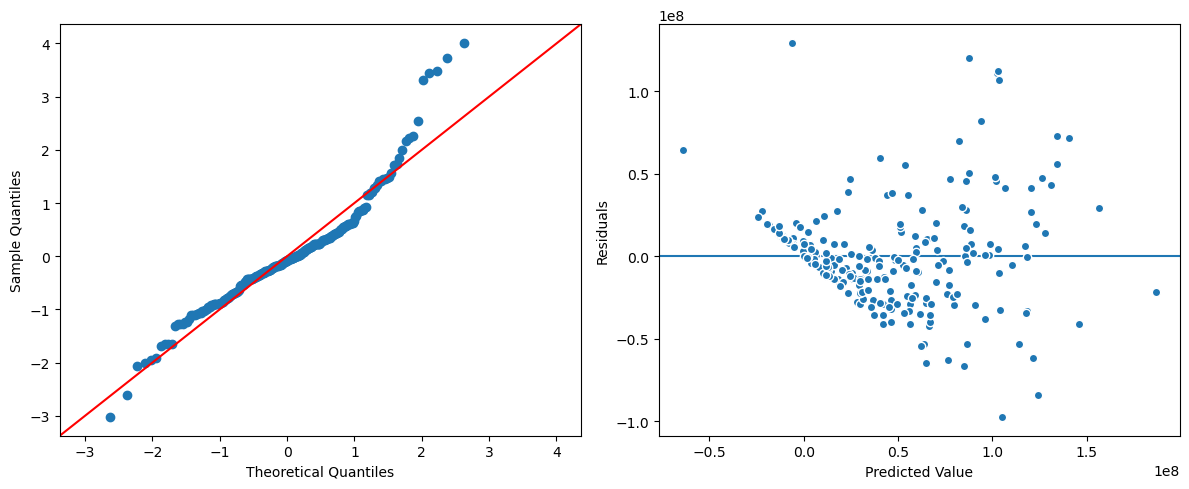

In [74]:
# Model 4 with outliers removed

X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_df,y_train)

In [75]:
# Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

# Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.630
Testing R^2: 0.450


- Our R2 score on this model was 45%. It didn't do so good either.

### Model 5

- For my 5th model, I'll be removing features using p-values

In [76]:
# Get pvalues from model result
pvals = result.pvalues 
pvals

certification_G          6.088168e-01
certification_MISSING    4.190146e-08
certification_NR         6.212500e-04
certification_PG         1.085619e-01
certification_PG-13      1.757336e-01
certification_R          8.165991e-04
adult                    6.029296e-01
budget                   9.722875e-01
popularity               2.424495e-01
runtime                  6.001993e-01
vote_average             6.081555e-01
vote_count               6.158340e-01
year                     6.113936e-01
month                    6.041012e-01
day                      6.133363e-01
belongs_to_collection    1.401160e-05
Genre_Comedy             1.351509e-01
Genre_Music              8.811952e-01
Genre_Romance            7.433365e-03
Genre_Science Fiction    8.555364e-01
Genre_Drama              6.936513e-02
Genre_Action             7.455048e-01
Genre_Crime              5.714803e-02
Genre_Adventure          7.355084e-01
Genre_Animation          3.091525e-01
Genre_Fantasy            9.075844e-03
Genre_Horror

In [77]:
# Check for p-values that are >.05
pvals[ pvals>.05]

certification_G          0.608817
certification_PG         0.108562
certification_PG-13      0.175734
adult                    0.602930
budget                   0.972288
popularity               0.242450
runtime                  0.600199
vote_average             0.608156
vote_count               0.615834
year                     0.611394
month                    0.604101
day                      0.613336
Genre_Comedy             0.135151
Genre_Music              0.881195
Genre_Science Fiction    0.855536
Genre_Drama              0.069365
Genre_Action             0.745505
Genre_Crime              0.057148
Genre_Adventure          0.735508
Genre_Animation          0.309153
Genre_Horror             0.099983
Genre_Thriller           0.438407
Genre_History            0.778048
Genre_Family             0.560382
Genre_Mystery            0.228168
Genre_Western            0.267033
Genre_War                0.736412
const                    0.608815
dtype: float64

In [78]:
## Get list of ALL genre columns to see how many are sig
genre_cols = [c for c in df_clean.columns if c.startswith("Genre")]
genre_cols

['Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [79]:
## save just genre pvalues
genre_pvals = pvals[genre_cols]
## calc what % are insig?
genre_pvals.sum()/len(genre_pvals)

0.3638686309119353

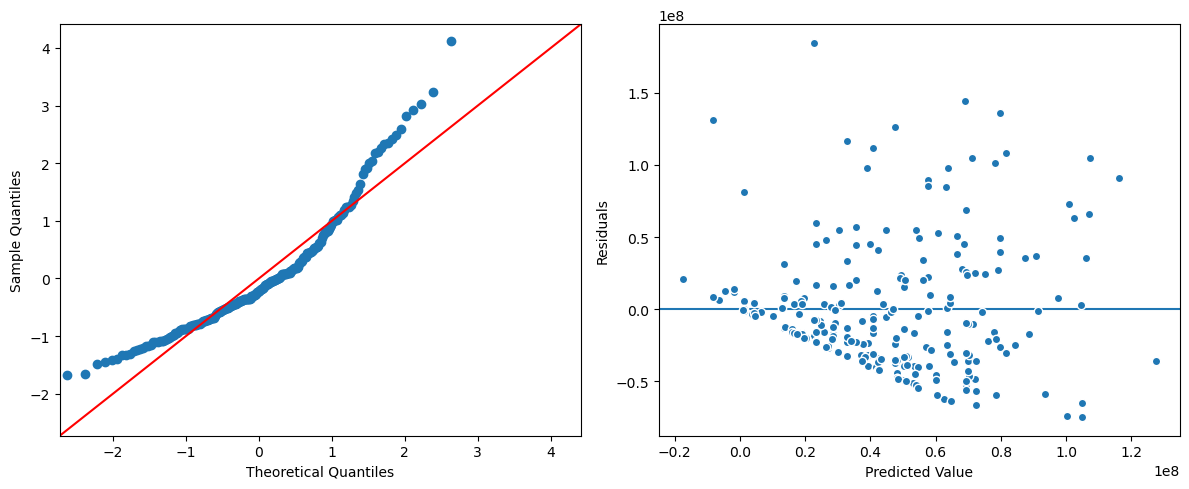

In [80]:
## Make x,y vars, but drop features with bad pvalues
df_clean_iqr = df_clean_iqr.drop(columns=['adult','budget', 'popularity', 
                                          'runtime', 'vote_count', 'vote_average', 
                                          'year', 'month', 'day'])
X_train_df, y_train, X_test_df, y_test = \
                                get_train_test_split(df_clean_iqr,)
## MAKE AND EVALUATE OLS
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [81]:
# Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.263
Testing R^2: -0.059


- Our r2 performed extremely poor on this model, giving us a -0.059 score.

### Model 6

- We would be addressing our multicollinearity for this model.

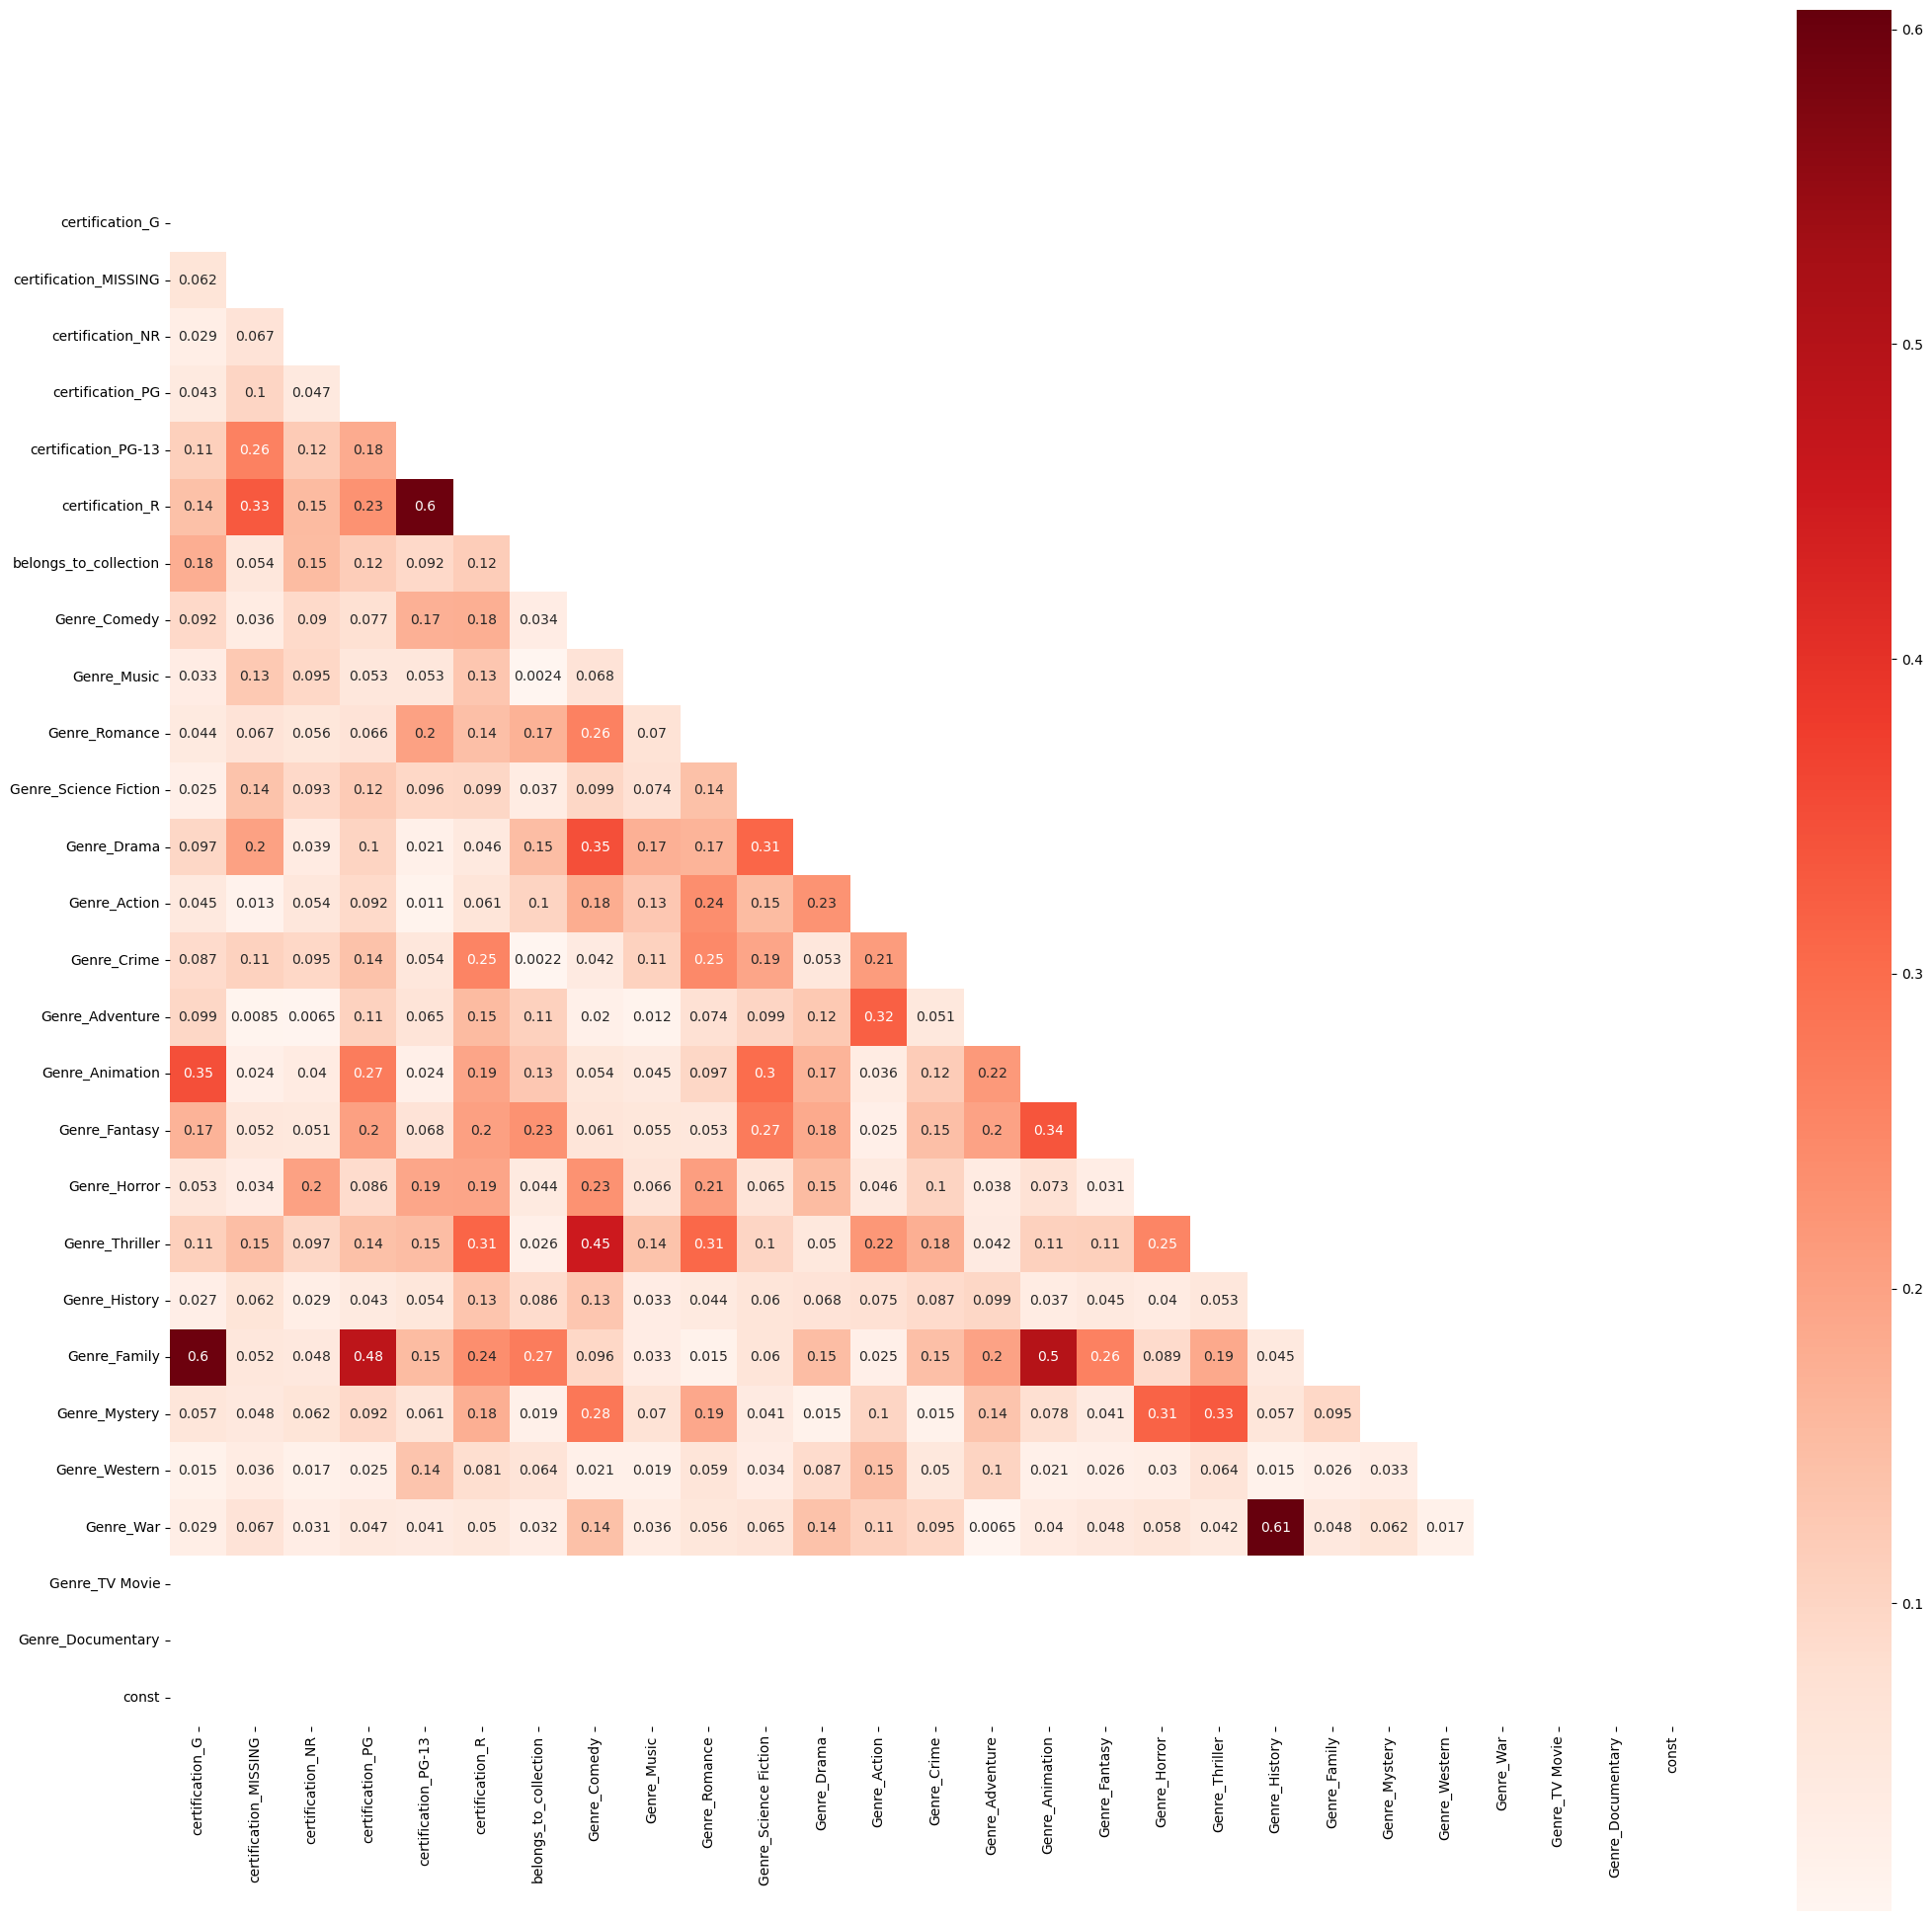

In [82]:
## Calculating the mask to hide the upper-right of the triangle
plt.figure(figsize=(25,25))
corr = X_train_df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [83]:
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

,certification_G,certification_MISSING,certification_NR,certification_PG,certification_PG-13,certification_R,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,const
214,-0.026087,-0.126087,-0.030435,-0.065217,-0.321739,0.569565,-0.217391,-0.391304,-0.03913,0.713043,-0.117391,0.53913,-0.291304,-0.221739,-0.130435,-0.047826,-0.069565,-0.095652,-0.317391,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0
1319,-0.026087,-0.126087,-0.030435,-0.065217,0.678261,-0.430435,-0.217391,-0.391304,-0.03913,0.713043,0.882609,-0.46087,0.708696,-0.221739,0.869565,0.952174,0.930435,-0.095652,0.682609,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0
1659,-0.026087,-0.126087,-0.030435,-0.065217,-0.321739,0.569565,-0.217391,-0.391304,-0.03913,-0.286957,-0.117391,0.53913,-0.291304,-0.221739,-0.130435,-0.047826,-0.069565,-0.095652,0.682609,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0
223,-0.026087,-0.126087,-0.030435,-0.065217,0.678261,-0.430435,-0.217391,0.608696,-0.03913,-0.286957,0.882609,-0.46087,0.708696,-0.221739,0.869565,-0.047826,-0.069565,-0.095652,-0.317391,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0
1754,-0.026087,-0.126087,-0.030435,-0.065217,-0.321739,0.569565,-0.217391,-0.391304,-0.03913,0.713043,-0.117391,0.53913,-0.291304,-0.221739,-0.130435,-0.047826,-0.069565,-0.095652,-0.317391,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,-0.026087,-0.126087,-0.030435,-0.065217,-0.321739,0.569565,-0.217391,-0.391304,-0.03913,-0.286957,-0.117391,-0.46087,0.708696,0.778261,-0.130435,-0.047826,-0.069565,-0.095652,0.682609,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0
1344,-0.026087,-0.126087,-0.030435,-0.065217,0.678261,-0.430435,-0.217391,0.608696,-0.03913,0.713043,-0.117391,-0.46087,-0.291304,-0.221739,-0.130435,-0.047826,-0.069565,-0.095652,-0.317391,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0
1883,-0.026087,-0.126087,-0.030435,-0.065217,0.678261,-0.430435,-0.217391,-0.391304,-0.03913,-0.286957,0.882609,-0.46087,0.708696,-0.221739,-0.130435,-0.047826,-0.069565,-0.095652,0.682609,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0
10,-0.026087,-0.126087,-0.030435,-0.065217,-0.321739,0.569565,-0.217391,-0.391304,-0.03913,-0.286957,-0.117391,0.53913,-0.291304,0.778261,-0.130435,-0.047826,-0.069565,0.904348,0.682609,-0.026087,-0.069565,-0.108696,-0.008696,-0.030435,0.0,0.0,0.0


In [84]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new dataframe to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


certification_G               inf
certification_MISSING         inf
certification_NR              inf
certification_PG              inf
certification_PG-13           inf
certification_R               inf
belongs_to_collection    1.238341
Genre_Comedy             2.043182
Genre_Music              1.125196
Genre_Romance            1.458906
Genre_Science Fiction    1.516770
Genre_Drama              1.921662
Genre_Action             1.546874
Genre_Crime              1.425372
Genre_Adventure          1.282180
Genre_Animation          1.636002
Genre_Fantasy            1.326616
Genre_Horror             1.417362
Genre_Thriller           1.695852
Genre_History            1.742415
Genre_Family             3.048321
Genre_Mystery            1.363251
Genre_Western            1.099392
Genre_War                1.739400
Genre_TV Movie                NaN
Genre_Documentary             NaN
const                         NaN
dtype: float64

In [85]:
## Sort VIF for inspect
VIF.sort_values()

Genre_Western            1.099392
Genre_Music              1.125196
belongs_to_collection    1.238341
Genre_Adventure          1.282180
Genre_Fantasy            1.326616
Genre_Mystery            1.363251
Genre_Horror             1.417362
Genre_Crime              1.425372
Genre_Romance            1.458906
Genre_Science Fiction    1.516770
Genre_Action             1.546874
Genre_Animation          1.636002
Genre_Thriller           1.695852
Genre_War                1.739400
Genre_History            1.742415
Genre_Drama              1.921662
Genre_Comedy             2.043182
Genre_Family             3.048321
certification_R               inf
certification_PG-13           inf
certification_PG              inf
certification_NR              inf
certification_MISSING         inf
certification_G               inf
Genre_TV Movie                NaN
Genre_Documentary             NaN
const                         NaN
dtype: float64

In [86]:
## Set float format to view vals not in scientfic notation
pd.set_option('display.float_format',lambda x: f'{x:.2f}')

In [87]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

Genre_Western           1.10
Genre_Music             1.13
belongs_to_collection   1.24
Genre_Adventure         1.28
Genre_Fantasy           1.33
Genre_Mystery           1.36
Genre_Horror            1.42
Genre_Crime             1.43
Genre_Romance           1.46
Genre_Science Fiction   1.52
Genre_Action            1.55
Genre_Animation         1.64
Genre_Thriller          1.70
Genre_War               1.74
Genre_History           1.74
Genre_Drama             1.92
Genre_Comedy            2.04
Genre_Family            3.05
Genre_TV Movie           NaN
Genre_Documentary        NaN
const                    NaN
dtype: float64

In [88]:
## filter for VIF that are > 5
VIF[VIF>5]

Series([], dtype: float64)

In [89]:
high_vif = VIF[VIF>5].index
high_vif

Index([], dtype='object')

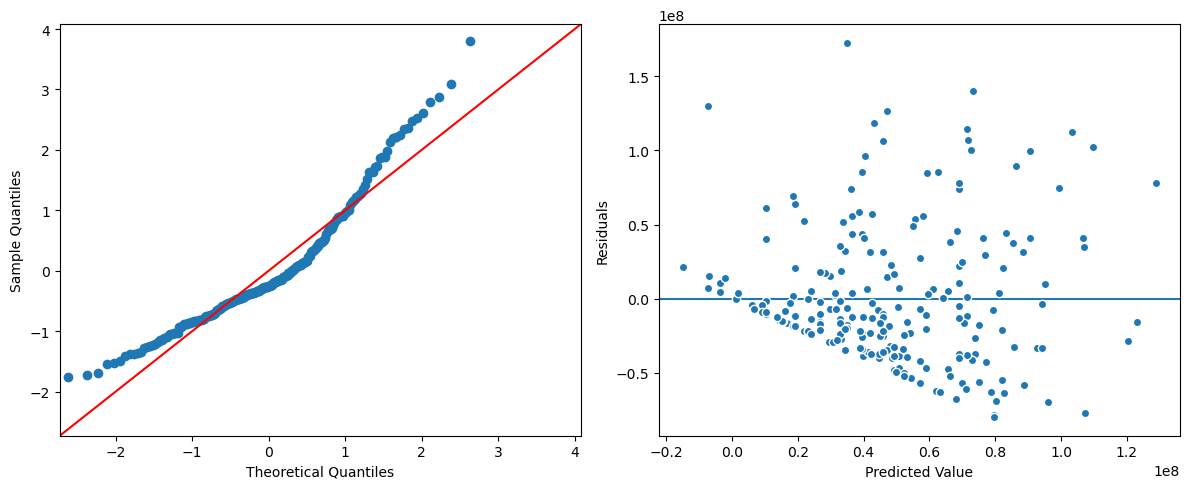

In [90]:
## make new df_final copy of prev df
df_final = df_clean_iqr.drop(columns =high_vif).copy()
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_final)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [91]:
# Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

# Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.264
Testing R^2: -0.070


- This also performed poorly. Giving us a score of -0.070

###  Final Model 7:

- I'll be using a random forest regressor for my fianl model.

In [92]:
from sklearn.ensemble import RandomForestRegressor
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(random_state=42, verbose=1)

In [93]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.967
Testing R^2: 0.744


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


- Our RFM gave us a 74.4% score. 

## Conclusion:

- After testing 6 different models. Judging from the R2 scores, I can conclude that our best model was Model 2 with a 73.4% testing score, because it meets the assumptions of our Linear Regression. This will allow us to trust our model more. I wouldn't recommend any other models asides the RFM that gave us close to 73.4% (74.4%). Models 4,5 and 6 were very giving poor results, would definitely not recommend. Overall we could trust the outputs and results of Model 1 and 7 (RFM)